# Linear Regression

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables.
Linear regression is fitting a line to represent set of obeservations.

To perform this, we use method called least squares or Ordinary least squares (OLS).  

    By the principle of least squares: minimizing the sum of the squares of the differences between the 
    observed dependent variable (values of the variable being predicted) in the given dataset and those 
    predicted by the linear function.
    
    For the equation of slope intercept of the line, `y = mx + b`
                
                 (corelation between two variables) X (standard deviation of x)
    slope `m` = --------------------------------------------------------------
                                     (standard deviation of y)

### Enough Explanation, lets learn by example!

firstly we will fabricate some data that shows a roguhly linear relationship between amount spent on advertising  of a product and its respective sales.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

datapoints = 40

advertising_cost = np.linspace(50, 50000, datapoints)[:, np.newaxis]
sales = np.sin(advertising_cost) + 0.1*np.power(advertising_cost,2) + 0.5*np.random.randn(datapoints,1)
print(advertising_cost.shape)
print(sales.shape)

(40, 1)
(40, 1)


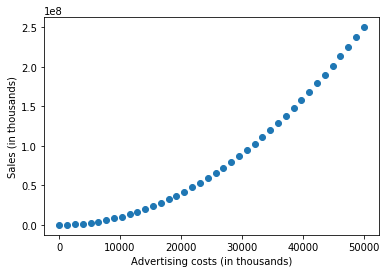

In [2]:
plt.scatter(advertising_cost, sales)
plt.xlabel('Advertising costs (in thousands)')
plt.ylabel('Sales (in thousands)')
plt.show()

As 'advertising_cost' and 'sales' are numpy array, they are represented as list of lists containing single value.
see following output to understand better.

In [3]:
print(advertising_cost)

[[   50.        ]
 [ 1330.76923077]
 [ 2611.53846154]
 [ 3892.30769231]
 [ 5173.07692308]
 [ 6453.84615385]
 [ 7734.61538462]
 [ 9015.38461538]
 [10296.15384615]
 [11576.92307692]
 [12857.69230769]
 [14138.46153846]
 [15419.23076923]
 [16700.        ]
 [17980.76923077]
 [19261.53846154]
 [20542.30769231]
 [21823.07692308]
 [23103.84615385]
 [24384.61538462]
 [25665.38461538]
 [26946.15384615]
 [28226.92307692]
 [29507.69230769]
 [30788.46153846]
 [32069.23076923]
 [33350.        ]
 [34630.76923077]
 [35911.53846154]
 [37192.30769231]
 [38473.07692308]
 [39753.84615385]
 [41034.61538462]
 [42315.38461538]
 [43596.15384615]
 [44876.92307692]
 [46157.69230769]
 [47438.46153846]
 [48719.23076923]
 [50000.        ]]


We need to convert the list of lists into a single list. Here's how we do it.

In [4]:
advertising_cost = advertising_cost[:,0]
sales = sales[:,0]

    Now we will print the 'advertising_cost' data again to see the difference

In [5]:
print(advertising_cost)

[   50.          1330.76923077  2611.53846154  3892.30769231
  5173.07692308  6453.84615385  7734.61538462  9015.38461538
 10296.15384615 11576.92307692 12857.69230769 14138.46153846
 15419.23076923 16700.         17980.76923077 19261.53846154
 20542.30769231 21823.07692308 23103.84615385 24384.61538462
 25665.38461538 26946.15384615 28226.92307692 29507.69230769
 30788.46153846 32069.23076923 33350.         34630.76923077
 35911.53846154 37192.30769231 38473.07692308 39753.84615385
 41034.61538462 42315.38461538 43596.15384615 44876.92307692
 46157.69230769 47438.46153846 48719.23076923 50000.        ]


### Now that our data is ready, we will perform Linear Regression using scipy.stats

In [6]:
from scipy import stats

slope, intercept, r_value, v_value, std_error = stats.linregress(advertising_cost, sales)

### To verify the fit of the regression model we will calulate ` r_squared = r_value ^ 2 `

    R-squared is a handy, seemingly intuitive measure of how well your linear model fits a set of observations.

    The closer the value of R-squared (represented further as r_squared), the better fit is the resultant regression model.

In [7]:
r_squared = r_value**2
print(r_squared)

0.9348636376936016


## Now lets use slope and intercept values generated from regression to plot predicted and observed lines:

1. define predict function to determine value of sales based on advertising_costs
2. generate the array for predicted model results to represent model prediction line
3. plot both subplots together

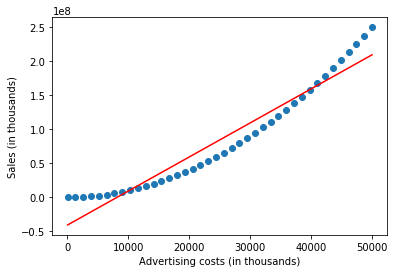

In [8]:
def predict(x):
    return slope * x + intercept

predicted_line = predict(advertising_cost)

plt.scatter(advertising_cost, sales)
plt.plot(advertising_cost, predicted_line, c='r') # assigning separeate color 


plt.xlabel('Advertising costs (in thousands)')
plt.ylabel('Sales (in thousands)')

plt.show()

## Lets make another regeression against normally distributed data

In [9]:
advertising_cost = np.random.normal(5000, 300, 100)
sales = 100 - (advertising_cost + np.random.normal(5000, 1.5, 100)) * 2

Here, data is not in the 'list of lists' representation, but is simply list of data points

In [10]:
print(advertising_cost)

[5072.35599589 5150.1873127  4742.191401   5450.35513339 4656.52275921
 4819.06769378 4747.82583684 5402.30387315 4857.7798845  4905.25617217
 4929.45554305 4945.57248768 4972.77558788 4835.6738781  4825.53655556
 4740.28282902 5095.40069583 4937.72401941 5408.29424659 4844.09382069
 4789.84827177 4464.90046771 5150.48033917 4649.18383207 4588.95285623
 4885.41589991 4716.22282931 4764.96796967 4693.84201756 5034.73181119
 5112.22205165 4794.2239328  5185.45550591 4822.47905802 5252.03465434
 4984.28361659 4973.67103076 4592.7646172  4683.95005171 4937.56364558
 4239.61751936 4861.18503973 4941.22468327 5041.99674171 5102.62203196
 5458.42928387 4870.10813381 5299.94593683 4554.83064366 4826.73551467
 4574.24621876 4670.51247672 5286.72939891 4962.27139791 5279.17761054
 4928.61785294 5466.71099189 4957.28167146 4400.05033125 5145.58798892
 5076.51099746 4651.92740555 5378.78687193 4967.2144398  5079.84662785
 5374.27628569 4973.83573411 5204.74904547 4708.57094987 4858.55845933
 4777.

### Lets calculate out regression model and verify the

In [11]:
slope, intercept, r_value, v_value, std_error = stats.linregress(advertising_cost, sales)

#verifying the fit using R-squared method
r_squared = r_value**2
print(r_squared)

0.999972092178982


#### Now lets plot the graph!

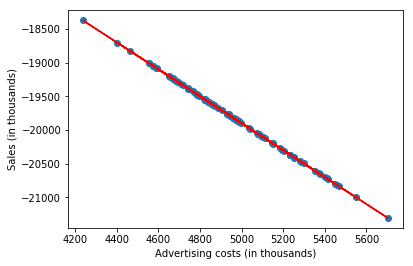

In [12]:
predicted_line = predict(advertising_cost)

plt.scatter(advertising_cost, sales)
plt.plot(advertising_cost, predicted_line, c='r') # assigning separeate color 


plt.xlabel('Advertising costs (in thousands)')
plt.ylabel('Sales (in thousands)')

plt.show()